<a href="https://colab.research.google.com/github/steed360/Data-Analysis/blob/main/Investigate_Plot_Options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*TODO*

-  Add a box around the different sections 
-  ... With labels for (unknown unknown etc)
-  Bring in the "real" data 

DONE 
- CIs

In [ ]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import transforms

import pandas as pd
import pandas.api.types as pdtypes


import seaborn as sns
#from matplotlib.ticker import FixedLocator, FixedFormatter

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/
import pandas as pd
import plotnine
%matplotlib inline

In [ ]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [ ]:
np.concatenate ( [ ['a'] , np.repeat( ['before', 'after'], n) ] )




array(['a', 'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'before', 'before', 'before', 'before',
       'before', 'before', 'after', 'after', 'after', 'after', 'after',
       'after', 'after', 'after', 'after', 'after', 'after', 'after',
       'after', 'after', 'after', 'after', 'after', 'after', 'after',
       'after'], dtype='<U6')

SyntaxError: ignored

In [ ]:
np.repeat ( 3,1 )

array([3])

In [ ]:
np.random.seed(123)
n = 20
mu = (10, 10)
sigma = (1, 3.6)

point_estimate = np.repeat ( 5,1)
before = np.random.normal(loc=mu[0], scale=sigma[0], size=n)
after  = np.random.normal(loc=mu[1], scale=sigma[1], size=n)

point_estimate_when  = np.repeat ( 'point\nestimate',1)
before_when   = np.repeat ( 'before', n)
after_when  = np.repeat ( 'after', n)


print ( np.percentile ( before, [5,95]) )

df = pd.DataFrame({
    
    'value':  np.hstack([point_estimate, before, after] )  ,
    'when':   np.hstack ( [point_estimate_when, before_when, after_when]),
    #'when':   np.repeat( [ 'before', 'after'], n),
})

df['when'] = df['when'].astype(pdtypes.CategoricalDtype(categories=['point\nestimate', 'before', 'after', 'other']))
df.head()

[ 8.44768606 12.18774329]


,value,when
0,5.000000,point\nestimate
1,8.914369,before
2,10.997345,before
3,10.282978,before
4,8.493705,before


In [ ]:
# DataFrame for the summary information about the distributions.

df_sum = pd.DataFrame ( 
   {
       'when' : ['before', 'before', 'after', 'after'],
       'which': ['lower bound', 'upper bound' ,'lower bound', 'upper bound'],
       'vals' : [7,9, 6,11 ],
      
   }
) 

df_sum['label'] = df_sum['which'] + df_sum['vals'].astype (str)

df_sum




,when,which,vals,label
0,before,lower bound,7,lower bound7
1,before,upper bound,9,upper bound9
2,after,lower bound,6,lower bound6
3,after,upper bound,11,upper bound11


/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_density.py:151: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_density.py:154: PlotnineWarning: Groups with fewer than 2 data points have been removed.


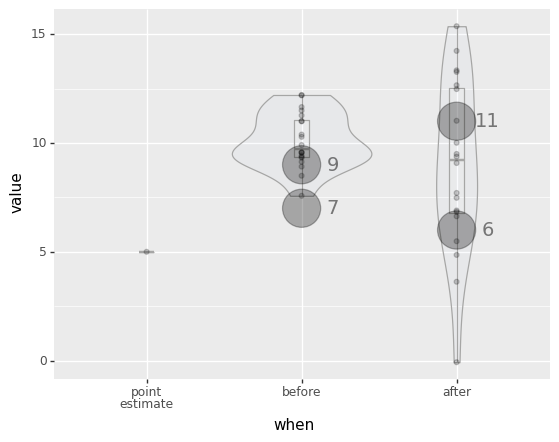

<ggplot: (8767240983730)>

In [ ]:
(ggplot(df, aes('when', 'value'))
 + geom_violin(df, alpha=0.04, color=GRAY8, fill=BLUE3)
 + geom_boxplot(width=0.1, alpha=0.09, color=GRAY8 )
 + geom_point(alpha=0.2)
  + geom_point (  aes(y='vals' ),data=df_sum , size=15, alpha=0.3)
  + geom_text( data=df_sum, mapping=aes(label = ( 'vals') ,y  = 'vals' )  ,
            #position = position_stack(vjust = .5),
            #format_string="CI:{}",  
            color = 'black', size = 14  , alpha=0.5, nudge_x=0.2) 
)